# Emotion Detection from Images using CNN
Train a simple CNN using the FER-2013 dataset and predict emotions from uploaded images.

## Step 1: Install Dependencies

In [ ]:
!pip install -q kaggle
!pip install -q opencv-python

## Step 2: Upload `kaggle.json` to Download FER-2013 Dataset
Go to your [Kaggle account](https://www.kaggle.com/account), scroll down to API, and click **Create New API Token**. Then upload the downloaded `kaggle.json` here.

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"safinahamedsajid","key":"617e10e4c2462aae08af1ff528022e59"}'}

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mkdir ~/.kaggle.

mkdir: cannot create directory ‘/root/.kaggle.’: File exists


In [ ]:
! cp /content/drive/MyDrive/Image_processing_lab/Project/json.api/kaggle.json ~/.kaggle/

In [ ]:
#import os
#os.makedirs('/content/drive/MyDrive/Image processing lab/Project/Json.api /kaggle.json', exist_ok=True)
#!mv /content/drive/MyDrive/Image_processing_lab/Project/json.api/kaggle.json /root/.kaggle/
!chmod 600 /content/drive/MyDrive/Image_processing_lab/Project/json.api/kaggle.json

In [ ]:
!kaggle datasets download -d msambare/fer2013
!unzip -q fer2013.zip -d fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)
replace fer2013/test/angry/PrivateTest_10131363.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace fer2013/test/angry/PrivateTest_10304478.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
replace fer2013/test/angry/PrivateTest_1054527.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace fer2013/test/angry/PrivateTest_10590091.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace fer2013/test/angry/PrivateTest_10590091.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


## Step 3: Load and Preprocess the Dataset

In [4]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Load CSV
df = pd.read_csv('/content/drive/MyDrive/Image_processing_lab/Project/fer2013.csv')

# Convert pixels to numpy arrays
def process_pixels(pixels):
    img = np.fromstring(pixels, sep=' ').reshape(48, 48).astype('float32')
    return img / 255.0

df['pixels'] = df['pixels'].apply(process_pixels)
x = np.stack(df['pixels'].values)
y = to_categorical(df['emotion'])

# Reshape for CNN
x = x.reshape(-1, 48, 48, 1)

# Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Step 4: Build and Train a Simple CNN Model

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.2924 - loss: 1.7451 - val_accuracy: 0.4121 - val_loss: 1.5156
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.4370 - loss: 1.4704 - val_accuracy: 0.4749 - val_loss: 1.3658
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 86s 92ms/step - accuracy: 0.4732 - loss: 1.3650 - val_accuracy: 0.4947 - val_loss: 1.3176
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 137s 86ms/step - accuracy: 0.5039 - loss: 1.2876 - val_accuracy: 0.5050 - val_loss: 1.2938
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.5287 - loss: 1.2330 - val_accuracy: 0.5081 - val_loss: 1.2817
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.5454 - loss: 1.1828 - val_accuracy: 0.5162 - val_loss: 1.2830
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 84s 88ms/step - accuracy: 0.5698 - loss: 1.1134 - val_accuracy: 0.5267 - val_loss: 1.2619
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 85s 92ms/step - accuracy: 0.5837 - loss: 1.0704 -

## Step 5: Upload an Image and Predict Emotion

Saving PrivateTest_30087405.jpg to PrivateTest_30087405.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


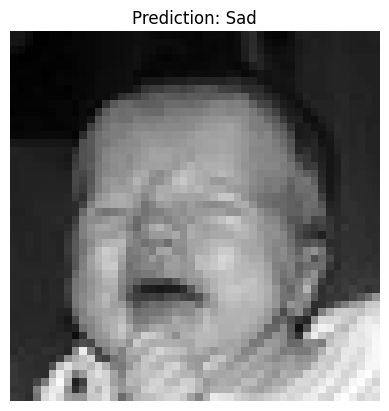

In [8]:
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Load and preprocess image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (48, 48))
img_input = img.reshape(1, 48, 48, 1) / 255.0

# Predict emotion
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
prediction = model.predict(img_input)

plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {emotion_labels[np.argmax(prediction)]}")
plt.axis('off')
plt.show()